Igorando el sesgo/bias y asumiendo activación sigmoidal implementar la siguiente red neuronal en NumPy

https://gadictos.com/neural-network-pt1/
<img src="https://gadictos.com/wp-content/uploads/2019/05/bp1.png">

In [1]:
import numpy as np

In [2]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

def relu(X):
    return np.maximum(0, X)

print(sigmoid(np.array([2,3,4])))
print(relu(np.array([2,3,4])))

[0.88079708 0.95257413 0.98201379]
[2 3 4]


In [3]:
Wc1 = np.array([
   [0.9,0.3,0.2],
   [0.8,0.5,0.4],
   [0.1,0.6,0.7]
])

In [4]:
Wc2 = np.array([0.3,0.5,0.9])

In [5]:
# 4 observaciones, 3 variables
X = np.array([
      [1,0,1],
      [1,2,3],
      [4,5,6],
      [6,7,8],
])

### Forward-propagation(inferencia, prediccion, o estimacion)


In [6]:
H = np.matmul(X,Wc1)

In [7]:
X.shape

(4, 3)

In [8]:
Wc1.shape

(3, 3)

In [9]:
H.shape

(4, 3)

In [10]:
H

array([[ 1. ,  0.9,  0.9],
       [ 2.8,  3.1,  3.1],
       [ 8.2,  7.3,  7. ],
       [11.8, 10.1,  9.6]])

In [11]:
A = sigmoid(H)

In [12]:
A

array([[0.73105858, 0.7109495 , 0.7109495 ],
       [0.94267582, 0.95689275, 0.95689275],
       [0.99972542, 0.99932492, 0.99908895],
       [0.9999925 , 0.99995892, 0.99993228]])

In [13]:
y_aprox = sigmoid(np.matmul(
    A,Wc2
))

In [14]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

In [15]:
def g(X):
  return sigmoid(np.matmul(X,Wc1))

In [16]:
def f(g):
  return sigmoid(np.matmul(g,Wc2))

In [17]:
y_aprox = f(g(X))

In [18]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

#### Orientado a objetos

In [19]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
       [0.9,0.3,0.2],
       [0.8,0.5,0.4],
       [0.1,0.6,0.7]
    ])

    self. Wc2  = np.array([0.3,0.5,0.9])

  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1))
    y_aprox = sigmoid(np.matmul(A,self.Wc2))

    return y_aprox

In [20]:
red = RedNeuronal()
red.forward_propagation(X)

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

<img src="https://i.imgur.com/IDFRq5a.png">

[0.73105858 0.78583498 0.68997448]

In [21]:
class RedNeuronal:
  def __init__(self):
    # 1 fila por neurona , 1 columna por variable de entrada
    self.Wc1 = np.array([
        [0.8,0.2],
        [0.4,0.9],
        [0.3,0.5]    
    ])

    # 1 elemento para cada neurona intermedia
    self. Wc2  = np.array([0.3,0.5,0.9])

  def forward_propagation(self,X):
    print(X.shape)
    print(self.Wc1.T.shape)
    A = sigmoid(np.matmul(X,self.Wc1.T)) # 1 fila por observacion, 1 columna por representacion intermedia [4,3]
    print(A)
    print(A.shape)
    y_aprox = sigmoid(np.matmul(A,self.Wc2)) # 1 fila por observacion,  1 unica salida [4,1]
    print(y_aprox.shape)
    return y_aprox

In [22]:
# 4 observaciones, 2 variables
X = np.array([
      [1,1],
      [1,2],
      [4,5],
      [6,7],
])

In [23]:
red = RedNeuronal()
y_aprox = red.forward_propagation(X)

(4, 2)
(2, 3)
[[0.73105858 0.78583498 0.68997448]
 [0.76852478 0.90024951 0.78583498]
 [0.98522597 0.99776215 0.97587298]
 [0.99797468 0.99983344 0.9950332 ]]
(4, 3)
(4,)


In [24]:
y_aprox

array([0.77438027, 0.80026216, 0.84194007, 0.84485948])

<img src="Diagrama3.png">

<b>Solución orientada a objetos</b>

In [82]:
class RedNeuronal:
  def __init__(self):
    self.Bc1 = np.array([-10, 30])
    self.Wc1 = np.array([
       [20, -20],
       [20, -20]
    ])
    
    self.Bc2 = np.array([-30])
    self.Wc2  = np.array([20, 20])

  def forward_propagation(self,X):
    H = sigmoid(np.matmul(X,self.Wc1) + self.Bc1)
    y_aprox = sigmoid(np.matmul(H,self.Wc2) + self.Bc2) 
    
    return (H,y_aprox)

<img src="xor.png">

In [65]:
X = np.array([
      [0,0],
      [0,1],
      [1,0],
      [1,1],
])

In [83]:
red = RedNeuronal()
(H,y_aprox) = red.forward_propagation(X)

<b>Salida intermedia H = [h1,h2]</b>

In [67]:
#Vector H
H

array([[4.53978687e-05, 1.00000000e+00],
       [9.99954602e-01, 9.99954602e-01],
       [9.99954602e-01, 9.99954602e-01],
       [1.00000000e+00, 4.53978687e-05]])

<b>Resultado de la red neuronal</b>

In [93]:
#Y hat
np.around(y_aprox, 2)

array([0., 1., 1., 0.])

<b>Graficar cada punto de la representación intermedia(scatter)</b>

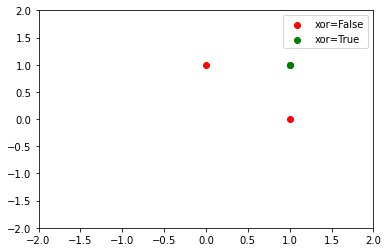

In [75]:
import matplotlib.pyplot as plt
plt.scatter(H[[0,3],0], H[[0,3],1], c='r', label='xor=False')
plt.scatter(H[[1,2],0], H[[1,2],1], c='g', label='xor=True')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.legend()
plt.show()

<b>Análisis del resultado intermedio, conclusión y opiniones</b>

Es posible visualizar que el vector H tiene los mismos valores cuando se envía X=[0,1] y X=[1,0], y es diferente para X=[1,1] o X=[0,0]. Esto es correcto de acuerdo a la tabla logica de la función Xor.

In [79]:
H

array([[4.53978687e-05, 1.00000000e+00],
       [9.99954602e-01, 9.99954602e-01],
       [9.99954602e-01, 9.99954602e-01],
       [1.00000000e+00, 4.53978687e-05]])

En la neurona final, los resultados cercanos al valor 0 (falso) y 1 (verdadero):

In [94]:
y_aprox

array([4.54391049e-05, 9.99954520e-01, 9.99954520e-01, 4.54391049e-05])

In [95]:
np.around(y_aprox, 2)

array([0., 1., 1., 0.])